In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Analysis outline:

Weather data:
- Plot of daily wind speed over time
- Plot of monthly wind speed over time

Wind farm data:
- Plot of total capacity per county
- Plot of total capacity over time (in years)
- Forecast of total capacity in 2025

The wind turbines at Meentycat in Donegal are made by Siemens - if these are the SWT-3.0-108 for example, they have a cut in speed of 3m/s, meaning that's when they start producing power, a rated wind speed of 12m/s, at which point they're operating most efficiently and producing their maximum power, and a cut out wind speed of 25m/s, above which they stop producting power for safety reasons. 

https://en.wind-turbine-models.com/turbines/751-siemens-swt-3.0-108

Between the cut in and rated speeds the power produced varies as wind speed increases:

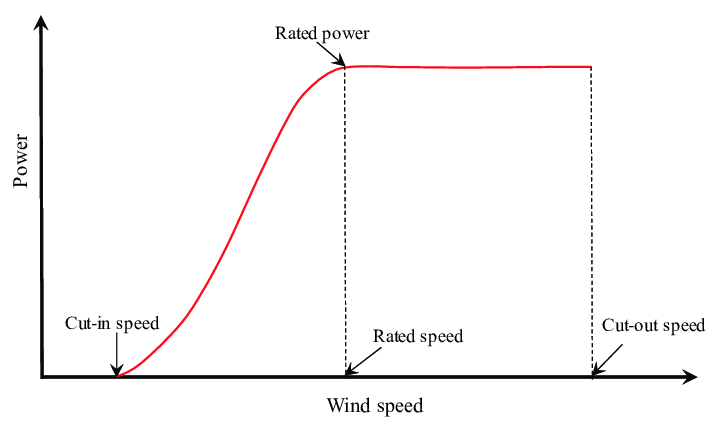

https://www.researchgate.net/post/What-is-the-optimum-wind-speed-to-generate-electricity-by-a-wind-turbine

Question: 
- How often is the average daily wind speed within optimal energy production bounds for the above turbine type?

- Assuming every wind farm has the same types of turbine as Meentycat (and therefore the same wind speed / power profile), how much energy is produced per month compared to the theoretical max capacity of all wind farms?

It may be simpler in this case to ignore the cut in -> rated portion of the power curve, or maybe approximate it linearly, as in 3m/s => 25%, 6m/s => 50% of the rated power, but still <3m/s => 0 power. This is a broad approximation however, the power profile between cut in and rated does not appear to be linear as can be seen above, but this will give an idea of the amount produced. Additionally, not every turbine in the country is the same, and therefore does not have the same power profile, so this is also a broad approximation. 

There are additional simplifications in that we must use average wind speed at a maximum granularity of a daily level, rather than hourly reads. We are also unable to resolve wind farms to their most local weather station, so must rely on averages across the country rather than measurements taken in the vicinity of the farm. Finally, we do not know the height above sea level of the wind farms (this is available for the weather stations in both the station details csv and in the headers of the downloaded csv files however). Wind speed changes with height above sea level, typically increasing as elevation increases as shown in the Wind Analysis for Atlantic Marine Energy Test Site report (Loughlin & O'Malley, 2023) - https://www.seai.ie/sites/default/files/publications/Wind-Analysis-for-AMETS-A.pdf 

A large difference in elevation between the turbine and measurement equipment could translate to a large difference in wind speed.

- Plot of approximate energy produced over time

It should also be noted that met eireann encode their wind speeds in knots, so these will have to be converted to m/s.

In [ ]:
def knots_to_ms(x):
    kmh = x*1.852
    ms = kmh*(1000/3600)
    return ms

# x in m/s
def power_curve_approx(x):
    # wind speed too low, no power generated
    if x < 3:
        return 0
    # wind speed acceptable but suboptimal, operating at fractional capacity
    if x < 12:
        return x/12
    # wind speed optimal, operating at 100% capacity
    if x < 25:
        return x
    # wind speed too high, turbine disabled
    return 0